# How to generate JSON for WML Scoring Input
Pls see https://stackoverflow.com/questions/49526227/deep-learning-how-can-i-test-the-mnist-tutorial-model-on-wml for details

In [2]:
import json
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

C:\ProgramData\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Specify N th Image of MNIST dataset

In [3]:
N = 3  # specify the number

# Show Input Image

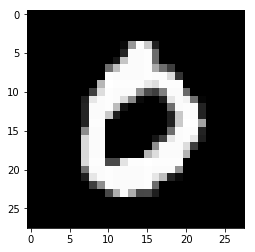

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
img = X_test[N]
img = np.array(img, dtype='float')
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Convert image to JSON format
#### AND Copy Json and paste it to "Enter input data" field of "test" UI. 

In [5]:
score_payload_data = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
score_payload_data = score_payload_data.astype("float32")/255
score_payload_data = score_payload_data[N].tolist() ## Here we are choosing the Nth image in the list to predict
scoring_payload = {"values": [score_payload_data]}

# save to file
with open('wml-input.json', 'w') as f:
    json.dump(scoring_payload,f)
# or print it directly    which ever will work.
print(json.dumps(scoring_payload))    

{"values": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.04313725605607033], [0.5882353186607361], [0.9921568632125854], [0.7921568751335144], [0.12156862765550613]

# or Call WML Scoring request from Python
###### You MUST  Copy & Paste it from "Code Snippets" of "Implementation" tab of UI,  as "credentials" & "requests.post" URL differs in each env.

In [6]:
import urllib3, requests, json

# retrieve your wml_service_credentials_username, wml_service_credentials_password, and wml_service_credentials_url from the
# Service credentials associated with your IBM Cloud Watson Machine Learning Service instance

wml_credentials={
"url": "https://ibm-watson-ml.mybluemix.net",
"username": "****",
"password": "****"
}

headers = urllib3.util.make_headers(basic_auth='{username}:{password}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
#payload_scoring = {"fields": [array_of_feature_columns], "values": [array_of_values_to_be_scored, another_array_of_values_to_be_scored]}
payload_scoring = scoring_payload
response_scoring = requests.post('https://ibm-watson-ml.mybluemix.net/v3/wml_instances/dacd782e-61c1-4112-b490-9a3273151741/published_models/1ab3391c-6c3f-44d5-b591-ad9ab722a3ac/deployments/d4d47ef8-e831-46a7-bd20-4bf1d425eda1/online', json=payload_scoring, headers=header)
print(json.loads(response_scoring.text))

#-------------
dic1 = json.loads(response_scoring.text)
list1 = dic1.get('values')[0]

{'fields': ['prediction'], 'values': [[0.9999867677688599, 6.174922795310067e-10, 0.0, 9.125209885496588e-07, 0.0, 0.0, 1.1732862731150817e-05, 1.7268935437186883e-07, 4.4984508917877974e-07, 8.695974292336802e-28]]}


# print result( Confidence of each Number )

In [7]:
print("number              confidence")
["{0}      ==>  {1}".format(i , v) for i, v in enumerate(list1)]

number              confidence


['0      ==>  0.9999867677688599',
 '1      ==>  6.174922795310067e-10',
 '2      ==>  0.0',
 '3      ==>  9.125209885496588e-07',
 '4      ==>  0.0',
 '5      ==>  0.0',
 '6      ==>  1.1732862731150817e-05',
 '7      ==>  1.7268935437186883e-07',
 '8      ==>  4.4984508917877974e-07',
 '9      ==>  8.695974292336802e-28']

In [8]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd(f"# Watson says: the image is {list1.index(max(list1))}.      confidence:({max(list1)})") # from Python 3.6 - f"xxx{hoge}"

# Watson says: the image is 0.      confidence:(0.9999867677688599)